<a href="https://colab.research.google.com/github/tago893/capstone/blob/main/EdaOnTsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum Predictions with ARIMA

## Contents:
* [Monthly Forecasting](#monthlyForecasting)
    * [Stationarity check and Seasonal decomposition](#StationarityCheck)
    * [Transformation](#Transformation)
    * [Differencing](#Differencing)
        * [Seasonal differentiation](#SeasonalDifferentiation")
        * [Regular differentiation](#RegularDifferentiation")
    * [Autocorrelation](#Autocorrelation")
    * [ARIMAModel](#ARIMAModel")
        * [Analysis of Results](#AnalysisARIMA")
        * [PredictionARIMA](#PredictionARIMA")

In [ ]:
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 167.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 116.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 120.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [ ]:
 from datetime import datetime, timedelta
 dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [ ]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

# download dataframe
data = pdr.get_data_yahoo("ETH-USD")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-02-26,1594.761108,1645.273438,1590.393066,1640.817139,1640.817139,5727967432
2023-02-27,1640.763672,1662.575684,1615.387939,1634.326416,1634.326416,7239824677
2023-02-28,1634.502441,1644.435791,1602.428101,1605.895142,1605.895142,6323676957


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1903 entries, 2017-11-09 00:00:00+00:00 to 2023-01-24 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1903 non-null   float64
 1   High       1903 non-null   float64
 2   Low        1903 non-null   float64
 3   Close      1903 non-null   float64
 4   Adj Close  1903 non-null   float64
 5   Volume     1903 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 168.6 KB


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# VISUALIZATION


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

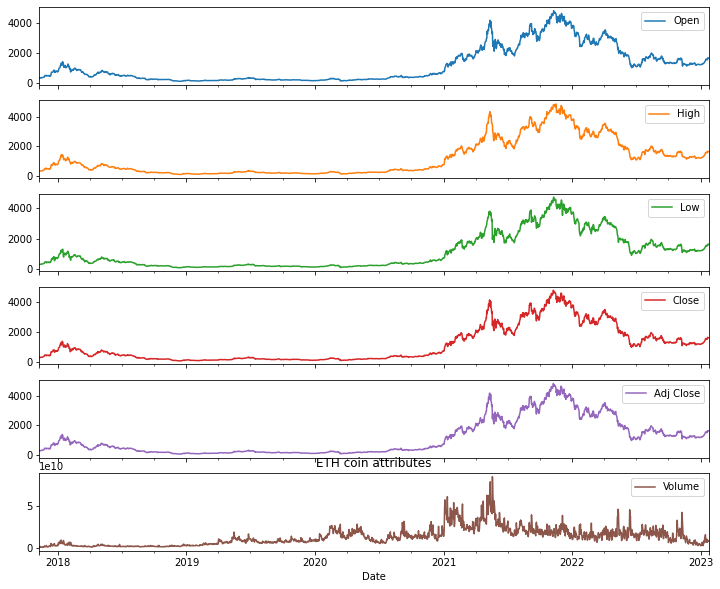

In [ ]:
selected_columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
data[selected_columns].plot(subplots=True, figsize=(12,10))
plt.title('ETH coin attributes')
plt.show()

In [ ]:
df2=pdr.get_data_yahoo("ETH-USD",end="2022-12-31")
del df2["Adj Close"]


[*********************100%***********************]  1 of 1 completed


In [ ]:
df2.describe()

,Open,High,Low,Close,Volume
count,1878.000000,1878.000000,1878.000000,1878.000000,1.878000e+03
mean,1129.623133,1165.957541,1088.267687,1129.866214,1.290502e+10
std,1188.875961,1225.196969,1146.809509,1188.248177,1.078973e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,211.154552,216.100323,206.291225,211.273056,4.482132e+09
50%,501.859009,522.925995,487.873993,502.186005,1.063680e+10
75%,1778.226990,1818.347504,1707.129456,1776.031830,1.819766e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


# Monthly Forecasting <a name="monthlyForecasting"></a>

This plot helps us visualize the max and min values of monthly helping us
infering that:

1. 30th november 2021 has the high maximum price and 31st december 2018 has high minimum price compared to other years
2. From year 2019 to 2020 the maximum and minimum closing prices of Ethereum closing price are near.

In [ ]:
df2.resample(rule="MS").mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-01,373.696317,393.111908,363.283635,379.732093,1.225341e+09
2017-12-01,630.583997,667.252580,596.163133,640.209291,2.576202e+09
2018-01-01,1093.099893,1163.799714,1024.934606,1103.646004,5.277749e+09
2018-02-01,882.527006,917.850394,825.723679,873.116318,2.978337e+09
2018-03-01,640.787129,653.875259,606.506935,625.761325,1.732780e+09
...,...,...,...,...,...
2022-08-01,1703.347814,1753.752185,1653.171245,1699.230370,1.787622e+10
2022-09-01,1491.504883,1528.951184,1443.930957,1484.229456,1.655508e+10
2022-10-01,1359.679743,1390.413358,1338.197585,1367.615620,1.232489e+10


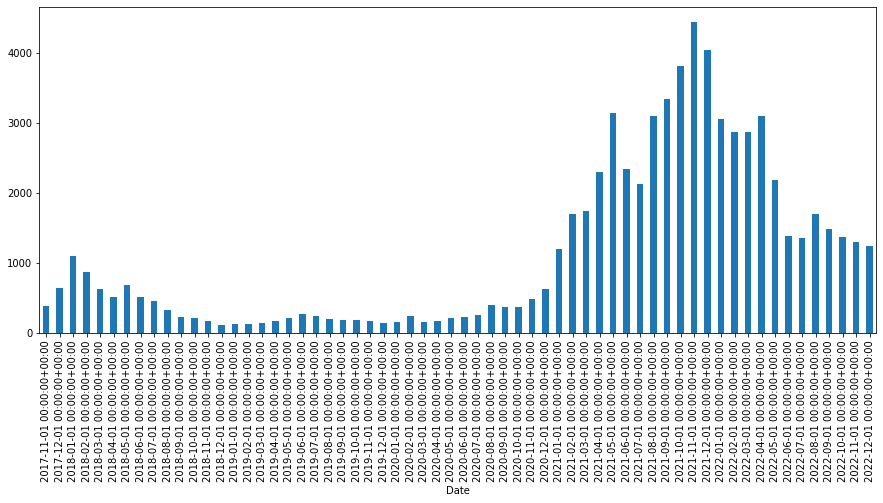

In [ ]:
df2['Close'].resample(rule='MS').mean().plot(kind="bar",figsize=(15,6))

# Stationarity check and seasonal decomposition<a name="StationarityCheck"></a>

##Stationarity check

If a time series is stationary, it implies the lack of broad trends (changes in mean and variance over time) in the data. This is important as a consideration in time series forecasting.

In [ ]:
import statsmodels.api as sm

<Figure size 2160x720 with 0 Axes>

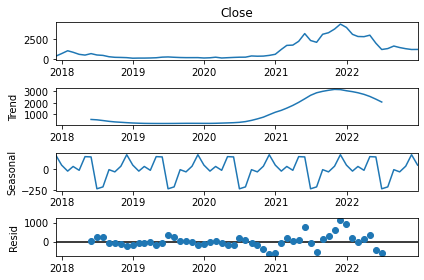

In [ ]:
plt.figure(figsize=[30,10])
sm.tsa.seasonal_decompose(df2.resample(rule='M').median().Close).plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adf_test(data['Close'])

ADF Statistics: -1.4103013496102765
p- value: 0.5773276795357133
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Seasonal decomposition

<ipython-input-24-ae6b5a04e204>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(data.Close, freq=12).plot()


Dickey–Fuller test: p=0.577328


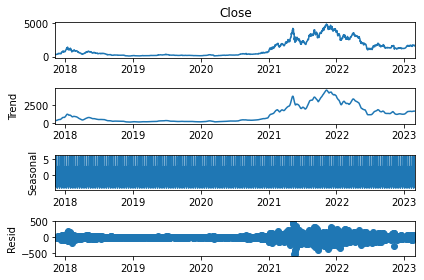

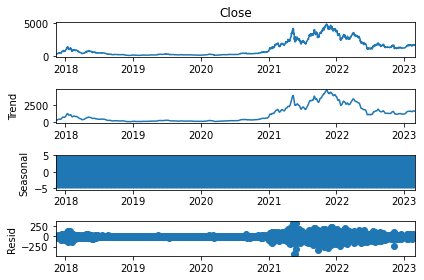

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal_decompose(data.Close, freq=12).plot()
seasonal_decompose(data.Close).plot()
print("Dickey–Fuller test: p=%f" % adfuller(data.Close)[1])
plt.show()

**Moving average**

As we know the ethereum prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average.

Text(0.5, 1.0, 'Ethereum Close Price moving average')

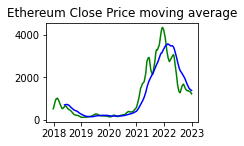

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(df2['Close'].rolling(50).mean(), color="green")
plt.plot(df2['Close'].rolling(200).mean(), color="blue")
plt.title('Ethereum Close Price moving average')

In [ ]:
adf_test(df2['Close'])